In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from bs4 import BeautifulSoup
import string

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how", "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself", "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should", "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then", "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were", "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why", "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself", "yourselves"]


table = str.maketrans('', '', string.punctuation)

In [ ]:
import tensorflow_datasets as tfds
import numpy as np


dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

sentences = []
labels = []


for s, l in train_dataset:
  sentences.append(s.numpy().decode('utf8'))
  labels.append(l.numpy())

print(f" จำนวนประโยคทั้งหมด: {len(sentences)} ประโยค")
print("ตัวอย่างประโยคแรก:", sentences[0])
print("Label ของประโยคนี้ (0=Neg, 1=Pos):", labels[0])

print(f"จำนวนคลาสทั้งหมด: {info.features['label'].num_classes}")


print(f"ชื่อของแต่ละคลาส: {info.features['label'].names}")

 จำนวนประโยคทั้งหมด: 25000 ประโยค
ตัวอย่างประโยคแรก: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Label ของประโยคนี้ (0=Neg, 1=Pos): 0
จำนวนคลาสทั้งหมด: 2
ชื่อของแต่ละคลาส: ['neg', 'pos']


In [ ]:
sentences[0:2]


["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development wa

In [ ]:
cleaned_sentences = []


if len(sentences) > 0:
    for sentence in sentences:
        sentence = sentence.lower()

        soup = BeautifulSoup(sentence, "html.parser")
        sentence = soup.get_text()


        sentence = sentence.translate(table)

        # แยกคำและลบ Stopwords
        words = sentence.split()
        filtered_sentence = [w for w in words if w not in stopwords]

        cleaned_sentences.append(" ".join(filtered_sentence))

    print("Clean Data Completely!")
    print("ตัวอย่างประโยคก่อนคลีน:", sentences[0])
    print("ตัวอย่างประโยคหลังคลีน:", cleaned_sentences[0])
else:
    print("Error: ไม่มีข้อมูลในลิสต์ sentences กรุณากลับไปเช็คขั้นตอนการโหลดข้อมูล")

Clean Data Completely!
ตัวอย่างประโยคก่อนคลีน: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
ตัวอย่างประโยคหลังคลีน: absolutely terrible movie dont lured christopher walken michael ironside great actors must simply worst role history even great acting not redeem movies ridiculous storyline movie early nineties us propaganda piece path

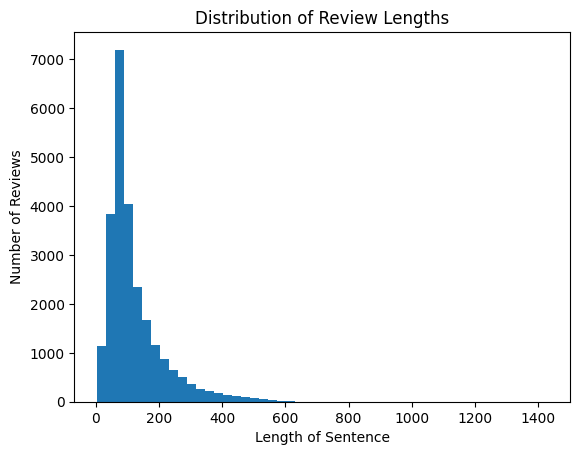

Mean length: 122.50216
Median length: 91.0
90th percentile: 242.10000000000218


In [ ]:
import matplotlib.pyplot as plt


sentence_lengths = [len(s.split()) for s in cleaned_sentences]


plt.hist(sentence_lengths, bins=50)
plt.xlabel('Length of Sentence')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.show()


import numpy as np
print(f"Mean length: {np.mean(sentence_lengths)}")
print(f"Median length: {np.median(sentence_lengths)}")
print(f"90th percentile: {np.percentile(sentence_lengths, 90)}")

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 2000
embedding_dim = 7
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 24000


In [ ]:
training_sentences = cleaned_sentences[0:training_size]
testing_sentences = cleaned_sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_sequences[1]

[485,
 648,
 1,
 28,
 481,
 534,
 1976,
 89,
 453,
 12,
 1255,
 1,
 1,
 1,
 7,
 1,
 78,
 103,
 1,
 1347,
 1,
 3,
 1777,
 39,
 813,
 1583,
 1161,
 473,
 247,
 89,
 330,
 476,
 10,
 1622,
 1,
 806,
 98,
 891,
 80,
 3,
 181,
 1905,
 176,
 7,
 330,
 476,
 1,
 106,
 59,
 1,
 129,
 218,
 83,
 260,
 3]

In [ ]:
wc=tokenizer.word_counts
print(wc)

OrderedDict({'absolutely': 1406, 'terrible': 1516, 'movie': 40232, 'dont': 7978, 'lured': 27, 'christopher': 375, 'walken': 113, 'michael': 1186, 'ironside': 24, 'great': 8490, 'actors': 4208, 'must': 2933, 'simply': 1884, 'worst': 2564, 'role': 2943, 'history': 1194, 'even': 11862, 'acting': 6021, 'not': 28840, 'redeem': 65, 'movies': 7490, 'ridiculous': 892, 'storyline': 767, 'early': 1469, 'nineties': 30, 'us': 3734, 'propaganda': 186, 'piece': 1442, 'pathetic': 428, 'scenes': 4867, 'columbian': 3, 'rebels': 45, 'making': 2479, 'cases': 153, 'revolutions': 10, 'maria': 158, 'conchita': 9, 'alonso': 10, 'appeared': 358, 'phony': 77, 'pseudolove': 1, 'affair': 307, 'nothing': 4015, 'emotional': 629, 'plug': 41, 'devoid': 99, 'real': 4358, 'meaning': 418, 'disappointed': 834, 'like': 18842, 'ruining': 45, 'walkens': 18, 'good': 13939, 'name': 1454, 'barely': 462, 'sit': 663, 'known': 926, 'fall': 730, 'asleep': 194, 'films': 7372, 'usually': 927, 'due': 869, 'combination': 220, 'things

{'<OOV>': 1, 'movie': 2, 'film': 3, 'not': 4, 'one': 5, 'like': 6, 'just': 7, 'good': 8, 'even': 9, 'no': 10, 'time': 11, 'really': 12, 'story': 13, 'see': 14, 'can': 15, 'much': 16, 'get': 17, 'will': 18, 'people': 19, 'bad': 20, 'also': 21, 'great': 22, 'first': 23, 'dont': 24, 'made': 25, 'movies': 26, 'make': 27, 'films': 28, 'way': 29, 'characters': 30, 'think': 31, 'watch': 32, 'many': 33, 'two': 34, 'character': 35, 'seen': 36, 'never': 37, 'little': 38, 'plot': 39, 'acting': 40, 'best': 41, 'love': 42, 'know': 43, 'life': 44, 'show': 45, 'ever': 46, 'better': 47, 'still': 48, 'off': 49, 'end': 50, 'say': 51, 'man': 52, 'scene': 53, 'scenes': 54, 'go': 55, 'something': 56, 'back': 57, 'doesnt': 58, 'real': 59, 'watching': 60, 'years': 61, 'thing': 62, 'actors': 63, 'though': 64, 'didnt': 65, 'new': 66, 'nothing': 67, 'actually': 68, 'now': 69, 'makes': 70, 'work': 71, 'another': 72, 'find': 73, 'funny': 74, 'old': 75, 'look': 76, 'going': 77, 'lot': 78, 'every': 79, 'part': 80, 

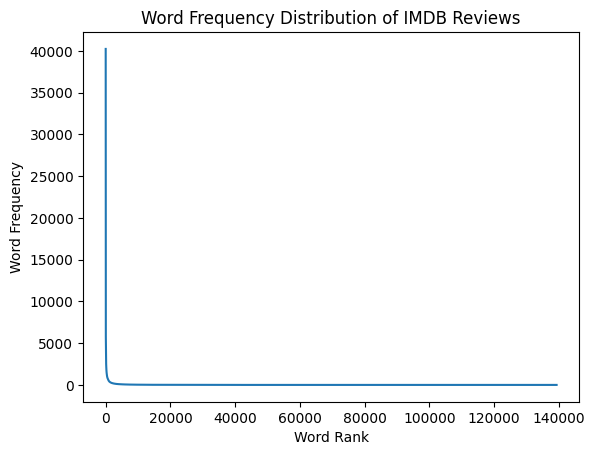

465
218


In [ ]:
import matplotlib.pyplot as plt
wc = tokenizer.word_counts
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))
print(word_index)
# print(newlist)
xs=[]
ys=[]
curr_x = 1
for item in newlist:
  xs.append(curr_x)
  curr_x=curr_x+1
  ys.append(newlist[item])

print(ys)
plt.plot(xs, ys)
plt.xlabel("Word Rank")
plt.ylabel("Word Frequency")
plt.title("Word Frequency Distribution of IMDB Reviews")
plt.show()

print(ys[1000])
print(ys[2000])

In [ ]:

import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_epochs = 30
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    training_padded,
    training_labels,
    epochs=150,
    validation_data=(testing_padded, testing_labels),
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/150
750/750 - 12s - 16ms/step - accuracy: 0.5142 - loss: 1.0357 - val_accuracy: 0.4700 - val_loss: 0.6965
Epoch 2/150
750/750 - 9s - 12ms/step - accuracy: 0.5348 - loss: 0.6887 - val_accuracy: 0.5460 - val_loss: 0.6909
Epoch 3/150
750/750 - 9s - 12ms/step - accuracy: 0.6265 - loss: 0.6548 - val_accuracy: 0.6330 - val_loss: 0.6540
Epoch 4/150
750/750 - 9s - 12ms/step - accuracy: 0.6304 - loss: 0.6541 - val_accuracy: 0.5930 - val_loss: 0.6862
Epoch 5/150
750/750 - 9s - 12ms/step - accuracy: 0.6554 - loss: 0.6371 - val_accuracy: 0.5300 - val_loss: 0.7031
Epoch 6/150
750/750 - 9s - 12ms/step - accuracy: 0.5888 - loss: 0.6852 - val_accuracy: 0.5810 - val_loss: 0.6800
Epoch 7/150
750/750 - 9s - 12ms/step - accuracy: 0.7122 - loss: 0.6005 - val_accuracy: 0.7730 - val_loss: 0.5324
Epoch 8/150
750/750 - 9s - 12ms/step - accuracy: 0.8155 - loss: 0.4776 - val_accuracy: 0.8210 - val_loss: 0.4548
Epoch 9/150
750/750 - 9s - 12ms/step - accuracy: 0.8438 - loss: 0.4167 - val_accuracy: 0.8440 -

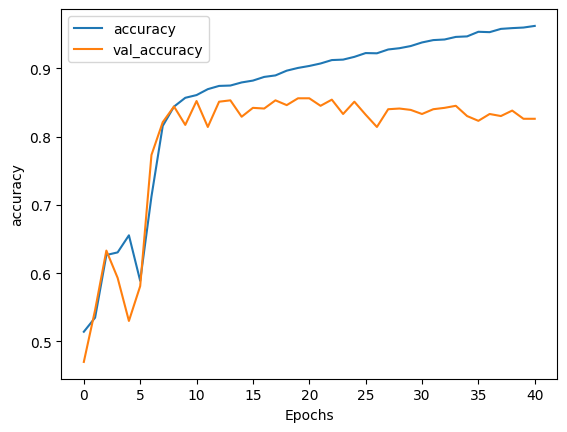

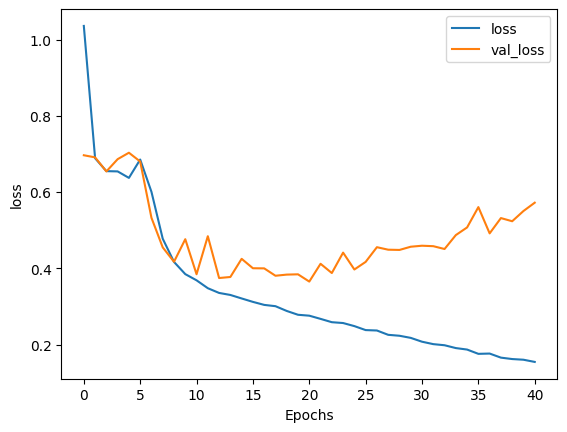

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[2]))
print(training_sentences[2])
print(labels[2])

<OOV> <OOV> <OOV> <OOV> <OOV> superb fashion jimmy stewart <OOV> <OOV> give enjoyable performances always seem come hollywood <OOV> telling people <OOV> city <OOV> <OOV> <OOV> yes <OOV> <OOV> law <OOV> <OOV> streets control town nothing even <OOV> <OOV> happened <OOV> side <OOV> <OOV> gold <OOV> mr <OOV> company appear <OOV> <OOV> city <OOV> <OOV> <OOV> american wild <OOV> viewers <OOV> <OOV> <OOV> type enjoyable <OOV> <OOV> plot <OOV> head <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mann photographs alberta rocky mountains superb fashion jimmy stewart walter brennan give enjoyable performances always seem come hollywood mountie telling people dawson city yukon elect marshal yes marshal enforce law gunfighters battling streets control town nothing even remotely resembling happened canadian side border klondike gold rush mr mann company appear mistaken dawson city deadwood canadian north american wild westcanadian viewers prepa

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(2000, 7)


In [ ]:
print(reverse_word_index[2])
print(weights[2])

movie
[-0.04121421 -0.094816    0.03590628  0.00656703 -0.03893919  0.0490842
 -0.06348921]


In [ ]:
import io

out_v = io.open('vecssen.tsv', 'w', encoding='utf-8')
out_m = io.open('metasen.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecssen.tsv')
  files.download('metasen.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_sentences = [
    "I absolutely loved this movie! The acting was superb and the story was very touching.",
    "This was the worst film I have ever seen. A complete waste of time and money.",
    "The cinematography was beautiful, but the plot was boring and the characters were flat.",
    "I thought it would be a good movie, but it turned out to be very disappointing and slow.",
    "An incredible masterpiece. I will definitely watch it again and recommend it to everyone!"
]
sequences = tokenizer.texts_to_sequences(test_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predictions = model.predict(padded)

for s, p in zip(test_sentences, predictions):
    print(f"{p[0]:.3f} = {s}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
0.932 = I absolutely loved this movie! The acting was superb and the story was very touching.
0.027 = This was the worst film I have ever seen. A complete waste of time and money.
0.148 = The cinematography was beautiful, but the plot was boring and the characters were flat.
0.124 = I thought it would be a good movie, but it turned out to be very disappointing and slow.
0.941 = An incredible masterpiece. I will definitely watch it again and recommend it to everyone!
